In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
names = ['preg', 'plas', 'pres', 'skin', 'test','mass', 'pedi', 'age', 'class']
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data = pd.read_csv(url, names=names)
print(type(data))
array = data.values
x = array[:,0:8] # take out class column
y = array[:,8] # class column as a 1D list of 1s and 0s
y

<class 'pandas.core.frame.DataFrame'>


array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Simple Cross Validation

In [2]:
from sklearn.model_selection import KFold # number of iterations that will divide my db, in the examples is 5
from sklearn.model_selection import cross_val_score # validation method: cross validation and gives u a score
from sklearn.linear_model import LogisticRegression # math model for classification (ml algorithm)

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True) # shuffle is the part that makes the randomness
# logistic regression param = lbfgs is the penalty for diff between y data and predicted data (error)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# apply everything
results = cross_val_score(model, x, y, cv=kfold)
results.mean() * 100 # percentage of accuracy

77.33253588516747

In [3]:
results.std() * 100 # std between iterations: how much each iter differs from the others

4.757436608427555

### Division by Percentage

In [4]:
from sklearn.model_selection import train_test_split # division by percentage
from sklearn.linear_model import LogisticRegression

test_size = 0.33
seed = 1
# returns you the subsets for training and testing for each x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
print(results * 100) # percentage of accuracy

77.55905511811024


### Cross Validation with Repetition

In [5]:
from sklearn.model_selection import RepeatedKFold # Cross Validation with Repetition
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

num_folds = 10
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeated)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
results = cross_val_score(model, x, y, cv=repeatedkfold)
results.mean() * 100 # percentage of accuracy

77.29870129870129

### Leave One Out Cross Validation

In [6]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=1000)
results = cross_val_score(model, x, y, cv=loocv)
print(results.mean() * 100)
print(results.std() * 100)

77.60416666666666
41.68944689773287


### Division by Percentage with Repetition (random 33% subsets)

In [7]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

test_size = 0.33
n_splits = 10
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
kfold = ShuffleSplit(n_splits=n_splits, test_size = test_size)
model = LogisticRegression(solver='lbfgs', max_iter=1000)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean() * 100)
print(results.std() * 100)

76.73228346456693
2.018652557999096


### Exercise

In [536]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

In [537]:
url = 'db/data.csv'
bcancer = pd.read_csv(url, header=0)
bcancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Cleaning

In [538]:
# Malign = 1
# Benign = 0
bcancer['diagnosis'] = bcancer['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
del bcancer['Unnamed: 32']
del bcancer['id']
bcancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


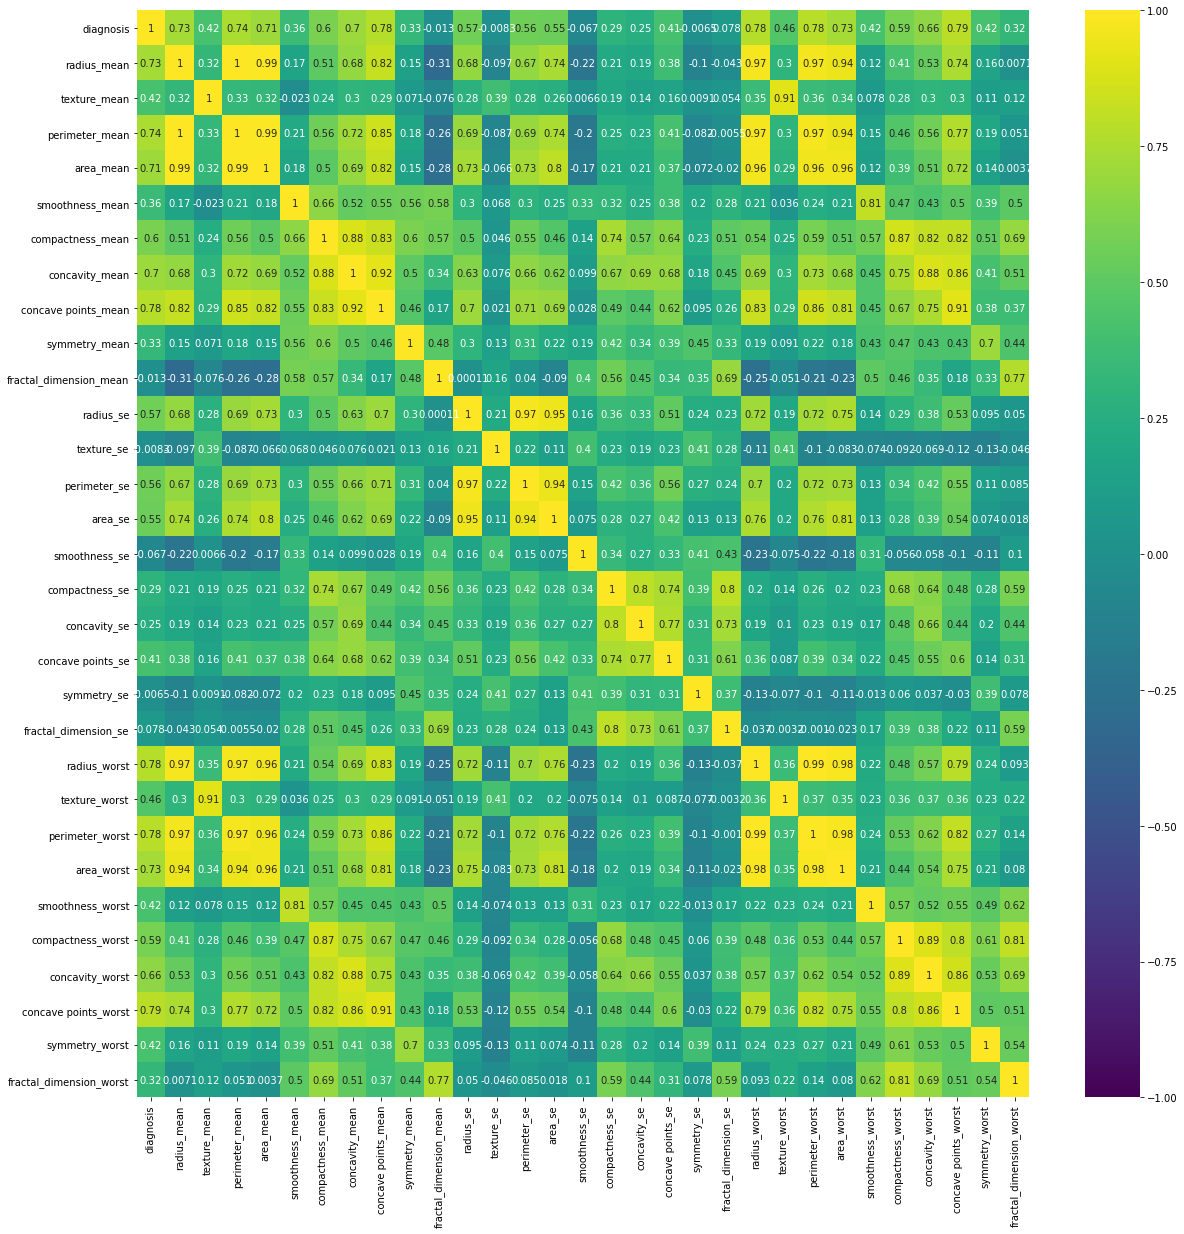

In [539]:
correlation = bcancer.corr(method='pearson')
plt.figure(figsize=(20,20))
ax = sea.heatmap(correlation, annot = True, cmap='viridis', vmin=-1, vmax=1)
plt.show()

In [540]:
cols = list(bcancer.columns)
unused = [col for col in cols if '_worst' not in col and '_se' not in col]
unused

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [541]:
df = bcancer[unused]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [542]:
correlation = df.corr(method='pearson')
correlation

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


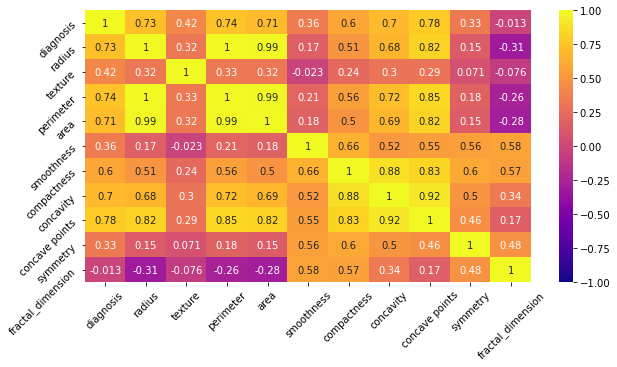

In [543]:
plt.figure(figsize=(10,5))
ax = sea.heatmap(correlation, annot = True, cmap='plasma', vmin=-1, vmax=1)
ax.set_yticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_yticklabels())], rotation = 45, fontsize = 10)
ax.set_xticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_xticklabels())], rotation = 45, fontsize = 10)
plt.show()

In [546]:
del df['radius_mean']
df

,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


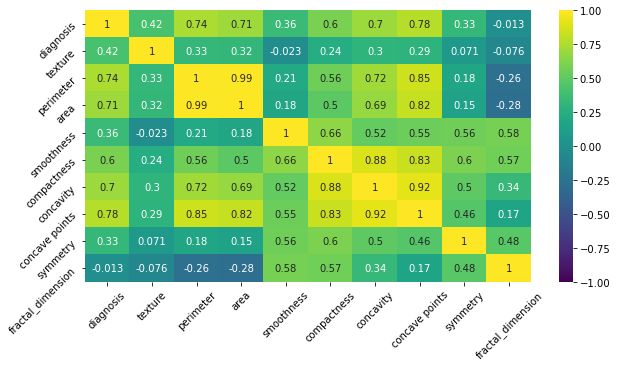

In [547]:
correlation = df.corr(method='pearson')
plt.figure(figsize=(10,5))
ax = sea.heatmap(correlation, annot = True, cmap='viridis', vmin=-1, vmax=1)
ax.set_yticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_yticklabels())], rotation = 45, fontsize = 10)
ax.set_xticklabels([(lambda x: x.get_text().replace('_mean', ''))(x) for x in list(ax.get_xticklabels())], rotation = 45, fontsize = 10)
plt.show()

In [548]:
df.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

In [549]:
print(df.head())

   diagnosis  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          1         10.38          122.80     1001.0          0.11840   
1          1         17.77          132.90     1326.0          0.08474   
2          1         21.25          130.00     1203.0          0.10960   
3          1         20.38           77.58      386.1          0.14250   
4          1         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  
0                 0.07871  
1                 0.05667  
2                 0.

In [174]:
benign = df.groupby('diagnosis').size()[0]
malign = df.groupby('diagnosis').size()[1]
total = malign + benign
print(total)
benign_p = benign / (total) * 100
malign_p = malign / (total) * 100
print(f"benign: {benign_p:.2f}%")
print(f"malign: {malign_p:.2f}%")

569
benign: 62.74%
malign: 37.26%


## 1. Cross Validation
### Simple Cross Validation

In [506]:
slots_cv_ac = []
slots_cv_std = []
array = df.values
print(len(array[0,:]))
x = array[:,1:len(array[0,:])]
y = array[:,0]
print(x)
print(y)

10
[[1.038e+01 1.228e+02 1.001e+03 ... 1.471e-01 2.419e-01 7.871e-02]
 [1.777e+01 1.329e+02 1.326e+03 ... 7.017e-02 1.812e-01 5.667e-02]
 [2.125e+01 1.300e+02 1.203e+03 ... 1.279e-01 2.069e-01 5.999e-02]
 ...
 [2.808e+01 1.083e+02 8.581e+02 ... 5.302e-02 1.590e-01 5.648e-02]
 [2.933e+01 1.401e+02 1.265e+03 ... 1.520e-01 2.397e-01 7.016e-02]
 [2.454e+01 4.792e+01 1.810e+02 ... 0.000e+00 1.587e-01 5.884e-02]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1

In [507]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True) 
model = LogisticRegression(solver='lbfgs', max_iter=3500)
# apply everything
results = cross_val_score(model, x, y, cv=kfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cv_ac.append(acc)
slots_cv_std.append(stdev)

accuracy: 90.51% std: 3.35%


### Standard Transform & Cross Validation

In [508]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True) 
model = LogisticRegression(solver='lbfgs', max_iter=100)
# apply everything
results = cross_val_score(model, rescaledX, y, cv=kfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cv_ac.append(acc)
slots_cv_std.append(stdev)

accuracy: 94.19% std: 2.40%


### Standard Transform, Power Transformer & Cross Validation

In [509]:
headers = list(df.columns)
headers = headers[1:len(headers)]
heads = [(lambda x: x.replace('_mean', ''))(x) for x in headers]

df_std = pd.DataFrame(rescaledX, columns = heads)
df_std

,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...
564,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


In [510]:
from sklearn.preprocessing import PowerTransformer

skewed = ['perimeter', 'area', 'compactness', 'concavity', 'concave points', 'fractal_dimension']
features = df_std[skewed]
#features = df_std.copy()
pt = PowerTransformer(method='yeo-johnson', standardize=False)
skl_yeo = pt.fit(features)
print(pt.lambdas_)
skl_yeo = pt.transform(features)
df_yeo = pd.DataFrame(data=skl_yeo, columns=skewed)
#df_yeo = pd.DataFrame(data=skl_yeo, columns=heads)
df_yeo

[ 0.38167627  0.00462353  0.27974738 -0.00606364  0.11014255  0.38765247]


,perimeter,area,compactness,concavity,concave points,fractal_dimension
0,0.962482,0.686391,1.795398,1.290439,1.353917,1.496873
1,1.200139,1.070349,-0.569125,-0.024132,0.447747,-1.079359
2,1.134382,0.941615,0.796736,0.857895,1.181774,-0.444305
3,-0.694419,-1.055024,1.836856,1.066713,0.942569,2.557155
4,1.248827,1.041443,0.458459,0.861061,0.932073,-0.653360
...,...,...,...,...,...,...
564,1.395443,1.210499,0.203671,1.077350,1.283206,-1.171759
565,1.161816,1.004368,-0.017947,0.525688,0.854873,-1.366486
566,0.568401,0.456610,-0.039217,0.045529,0.101107,-1.119031
567,1.355941,1.008555,1.791406,1.451479,1.394392,0.823598


In [511]:
df_std_yeo = df_std.copy()
cols = skewed
#cols = heads
for col in cols:
    df_std_yeo[col] = df_yeo[col]
df_std_yeo

,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,-2.073335,0.962482,0.686391,1.568466,1.795398,1.290439,1.353917,2.217515,1.496873
1,-0.353632,1.200139,1.070349,-0.826962,-0.569125,-0.024132,0.447747,0.001392,-1.079359
2,0.456187,1.134382,0.941615,0.942210,0.796736,0.857895,1.181774,0.939685,-0.444305
3,0.253732,-0.694419,-1.055024,3.283553,1.836856,1.066713,0.942569,2.867383,2.557155
4,-1.151816,1.248827,1.041443,0.280372,0.458459,0.861061,0.932073,-0.009560,-0.653360
...,...,...,...,...,...,...,...,...,...
564,0.721473,1.395443,1.210499,1.041842,0.203671,1.077350,1.283206,-0.312589,-1.171759
565,2.085134,1.161816,1.004368,0.102458,-0.017947,0.525688,0.854873,-0.217664,-1.366486
566,2.045574,0.568401,0.456610,-0.840484,-0.039217,0.045529,0.101107,-0.809117,-1.119031
567,2.336457,1.355941,1.008555,1.525767,1.791406,1.451479,1.394392,2.137194,0.823598


In [512]:
array = df_std2.values
transformedX = array[:,1:len(array[0,:])]

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True) 
model = LogisticRegression(solver='lbfgs', max_iter=100)
# apply everything
results = cross_val_score(model, transformedX, y, cv=kfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
# 92.26% with all cols pt # 91.56% with yeo std=True
slots_cv_ac.append(acc)
slots_cv_std.append(stdev)
display(slots_cv_ac, slots_cv_std)

accuracy: 91.56% std: 2.71%


[90.50751879699247, 94.19172932330827, 91.56015037593983]

[3.353535413949656, 2.3983747870874055, 2.7103687281616247]

## 2. Division by Percentage
### Division by Percentage

In [513]:
from sklearn.model_selection import train_test_split # division by percentage
from sklearn.linear_model import LogisticRegression

slots_dp_ac = []

test_size = 0.33
seed = 1
# returns you the subsets for training and testing for each x and y
# division by percentage is faster, but less accurate
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=3500)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
acc = results * 100
print(f"accuracy: {acc:.2f}%") # percentage of accuracy
slots_dp_ac.append(acc)

accuracy: 87.77%


### Standard Transform & Division by Percentage

In [514]:
test_size = 0.33
seed = 1

x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=100)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
acc = results * 100
print(f"accuracy: {acc:.2f}%") # percentage of accuracy
slots_dp_ac.append(acc)

accuracy: 93.09%


### Standard Transform, Power Transformer & Cross Validation

In [515]:
array = df_std_yeo.values
transformedX = array[:,1:len(array[0,:])]

x_train, x_test, y_train, y_test = train_test_split(transformedX, y, test_size = test_size, random_state = seed)
model = LogisticRegression(solver='lbfgs', max_iter=100)
model.fit(x_train, y_train)
results = model.score(x_test, y_test)
acc = results * 100
print(f"accuracy: {acc:.2f}%") # percentage of accuracy
slots_dp_ac.append(acc)
display(slots_dp_ac)

accuracy: 91.49%


[87.7659574468085, 93.08510638297872, 91.48936170212765]

## 3. Cross Validation with Repetition
### Cross Validation with Repetition

In [550]:
from sklearn.model_selection import RepeatedKFold # Cross Validation with Repetition
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

slots_cvr_ac = []
slots_cvr_std = []

num_folds = 10
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeated)
model = LogisticRegression(solver='lbfgs', max_iter=3500)
results = cross_val_score(model, x, y, cv=repeatedkfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
# like 6 seconds
slots_cvr_ac.append(acc)
slots_cvr_std.append(stdev)

accuracy: 90.58% std: 3.70%


### Standard Transform & Cross Validation with Repetition

In [517]:
num_folds = 10
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeated)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, rescaledX, y, cv=repeatedkfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cvr_ac.append(acc)
slots_cvr_std.append(stdev)

accuracy: 93.85% std: 3.26%


### Standard Transform, Power Transformer & Cross Validation with Repetition

In [518]:
array = df_std_yeo.values
transformedX = array[:,1:len(array[0,:])]

num_folds = 10
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds, n_repeats=num_repeated)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, transformedX, y, cv=repeatedkfold)
acc = results.mean() * 100 # percentage of accuracy
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_cvr_ac.append(acc)
slots_cvr_std.append(stdev)
display(slots_cvr_ac, slots_cvr_std)

accuracy: 91.60% std: 3.00%


[90.65037593984962, 93.84586466165413, 91.60087719298245]

[3.7072678400300236, 3.260699789087198, 3.0006791614237227]

## 4. Leave One Out Cross Validation
### Leave One Out Cross Validation

In [519]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

slots_loocv_ac = []
slots_loocv_std = []

loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=3500)
results = cross_val_score(model, x, y, cv=loocv)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_loocv_ac.append(acc)
slots_loocv_std.append(stdev)
# like 12 seconds

accuracy: 90.69% std: 29.06%


### Standard Transform & Leave One Out Cross Validation

In [520]:
loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, rescaledX, y, cv=loocv)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
# like 2 seconds
slots_loocv_ac.append(acc)
slots_loocv_std.append(stdev)

accuracy: 94.20% std: 23.37%


### Standard Transform, Power Transformer & Leave One Out Cross Validation

In [521]:
array = df_std_yeo.values
transformedX = array[:,1:len(array[0,:])]

loocv = LeaveOneOut()
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, transformedX, y, cv=loocv)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%") # like 2 seconds
slots_loocv_ac.append(acc)
slots_loocv_std.append(stdev)
display(slots_loocv_ac, slots_loocv_std)

accuracy: 91.74% std: 27.53%


[90.68541300527241, 94.20035149384886, 91.73989455184535]

[29.063674382128816, 23.37368023697195, 27.527825973019223]

## 5. Division by Percentage with Repetition (random 33% subsets)
### Division by Percentage with Repetition

In [522]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score # validation method
from sklearn.linear_model import LogisticRegression # math model for classification

slots_dpr_ac = []
slots_dpr_std = []

test_size = 0.33
n_splits = 10
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
kfold = ShuffleSplit(n_splits=n_splits, test_size = test_size)
model = LogisticRegression(solver='lbfgs', max_iter=3500)
results = cross_val_score(model, x, y, cv=kfold)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_dpr_ac.append(acc)
slots_dpr_std.append(stdev)

accuracy: 91.38% std: 1.59%


### Standard Transform & Division by Percentage with Repetition

In [523]:
test_size = 0.33
n_splits = 10
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
kfold = ShuffleSplit(n_splits=n_splits, test_size = test_size)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, rescaledX, y, cv=kfold)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_dpr_ac.append(acc)
slots_dpr_std.append(stdev)

accuracy: 93.67% std: 0.94%


### Standard Transform, Power Transformer & Division by Percentage with Repetition

In [524]:
test_size = 0.33
n_splits = 10
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
kfold = ShuffleSplit(n_splits=n_splits, test_size = test_size)
model = LogisticRegression(solver='lbfgs', max_iter=100)
results = cross_val_score(model, transformedX, y, cv=kfold)
acc = results.mean() * 100
stdev = results.std() * 100
print(f"accuracy: {acc:.2f}% std: {stdev:.2f}%")
slots_dpr_ac.append(acc)
slots_dpr_std.append(stdev)
display(slots_dpr_ac, slots_dpr_std)

accuracy: 91.97% std: 1.80%


[91.38297872340425, 93.67021276595744, 91.96808510638297]

[1.5921946326697627, 0.9350210548535614, 1.8030267294338604]

## Common Plots for all Techniques

C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

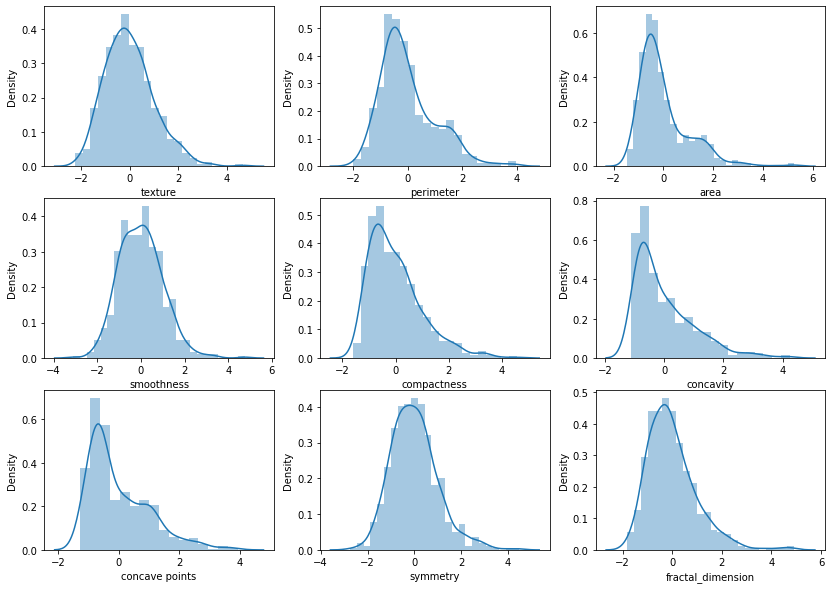

In [492]:
# SAME: RESCALED X DENSITY PLOT
f, axes = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
    for j in range(3):
        sns.distplot(df_std[heads[(i)*3 + j]], ax=axes[i,j])

C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

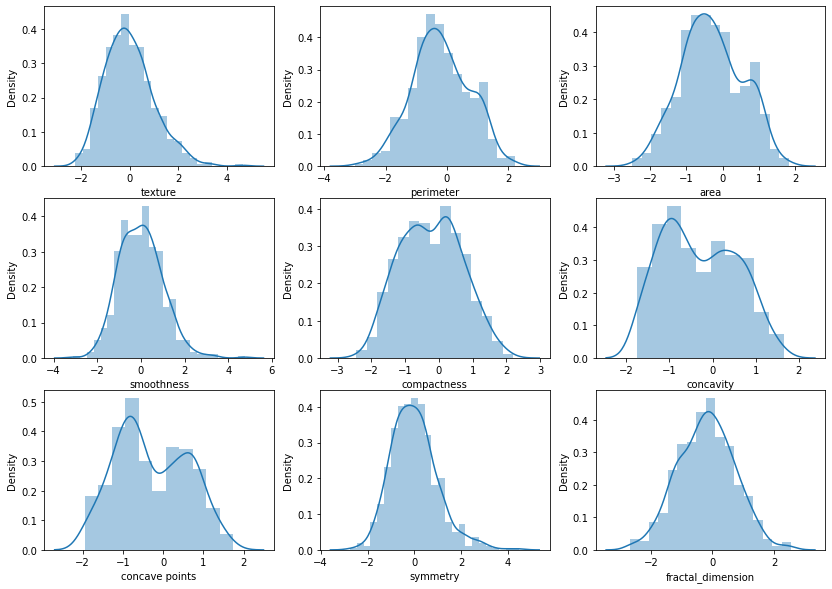

In [493]:
# SAME: TRANSFORMED X DENSITY PLOT
f, axes = plt.subplots(3,3, figsize=(14,10))
for i in range(3):
    for j in range(3):
        sns.distplot(df_std_yeo[heads[(i)*3 + j]], ax=axes[i,j])

9


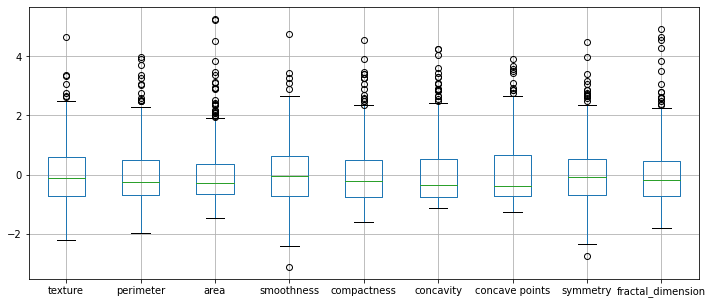

In [494]:
# SAME: RESCALED X BOX PLOT
fig1 = plt.figure(figsize=(12,5))
ax = fig1.gca()
# for logistic regression only transform using normalization

print(len(rescaledX[0,:]))
heads = [(lambda x: x.replace('_mean', ''))(x) for x in headers]
pd.DataFrame(rescaledX, columns=heads).plot(ax=ax, kind='box', subplots=False)
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

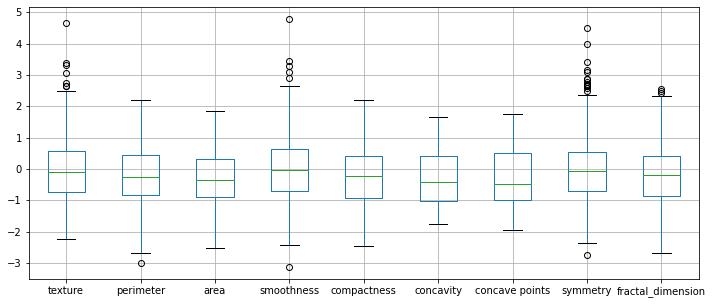

In [495]:
# SAME: TRANSFORMED X BOX PLOT
fig1 = plt.figure(figsize=(12,5))
ax = fig1.gca()
# for logistic regression only transform using normalization

df_std_yeo.plot(ax=ax, kind='box', subplots=False)
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

In [525]:
# bar plot accuracy for all tehcniques
slots = [0, 0, 0]
techniques = 5
totalac = []
totalstd = []
for i in range(techniques):
    totalac.append(slots)
    totalstd.append(slots)
display(totalac)
display(totalstd)
totalac[0] = slots_cv_ac
totalac[1] = slots_cvr_ac
totalac[2] = slots_dp_ac
totalac[3] = slots_dpr_ac
totalac[4] = slots_loocv_ac
display(totalac)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

[[90.50751879699247, 94.19172932330827, 91.56015037593983],
 [90.65037593984962, 93.84586466165413, 91.60087719298245],
 [87.7659574468085, 93.08510638297872, 91.48936170212765],
 [91.38297872340425, 93.67021276595744, 91.96808510638297],
 [90.68541300527241, 94.20035149384886, 91.73989455184535]]

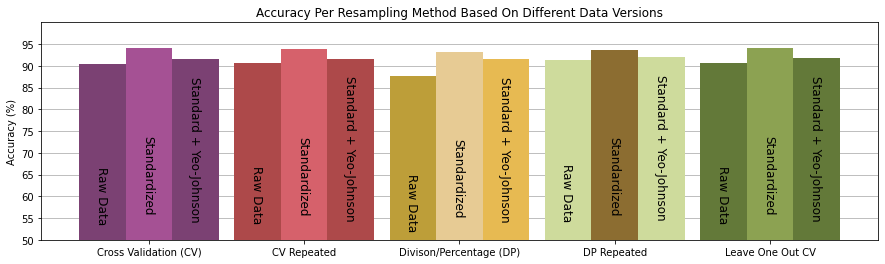

In [527]:
from matplotlib import cm
cmap1 = cm.get_cmap("tab20b")
top = 100
bottom = 50
deciles = int((top - bottom) / 10)

width = 0.3
xs = list(np.arange(0, len(totalac)))
offset = [-1, 0, 1]
colors = []
for i in range(len(totalac)):
    colors.append([cmap1(c - ((i+1)*0.15)) for c in np.array(totalac[i]) / max(totalac[i])])
labels = ['Raw Data', 'Standardized', 'Standard + Yeo-Johnson']
fig2 = plt.figure(figsize=(15, 4))
ax2 = fig2.add_subplot(1,1,1)

for t in range(len(totalac)):
    for d in range(len(totalac[t])):
        ax2.bar(np.array(xs[t]) + (width)*(offset[d]), totalac[t][d], width=width, color=colors[t][d], zorder=3)
        ax2.annotate(labels[d], (np.array(xs[t]) + (width)*(offset[d]) - (width/6.0), 
                                 totalac[t][d] - totalac[t][d] * 0.4), fontsize=12, rotation=-90)
ax2.set_xticks(xs)
ax2.set_xticklabels(['Cross Validation (CV)', 'CV Repeated', 'Divison/Percentage (DP)', 'DP Repeated', 'Leave One Out CV'])
ax2.grid(zorder=0, axis='y')
plt.ylim((bottom, top))
plt.yticks([i * deciles + bottom for i in range(deciles*2)])
ax2.set_title("Accuracy Per Resampling Method Based On Different Data Versions")
plt.ylabel("Accuracy (%)")
plt.show()
fig2.tight_layout()
fig2.savefig('acc-plot2.png', dpi=500)

     perimeter      area  compactness  concavity  concave points  \
0     1.269934  0.984375     3.283515   2.652874        2.532475   
1     1.685955  1.908708    -0.487072  -0.023846        0.548144   
2     1.566503  1.558884     1.052926   1.363478        2.037231   
3    -0.592687 -0.764464     3.402909   1.915897        1.451707   
4     1.776573  1.826229     0.539340   1.371011        1.428493   
..         ...       ...          ...        ...             ...   
564   2.060786  2.343856     0.219060   1.947285        2.320965   
565   1.615931  1.723842    -0.017833   0.693043        1.263669   
566   0.672676  0.577953    -0.038680   0.046588        0.105777   
567   1.982524  1.735218     3.272144   3.296944        2.658866   
568  -1.814389 -1.347789    -1.150752  -1.114873       -1.261820   

     fractal_dimension  
0             2.255747  
1            -0.868652  
2            -0.398008  
3             4.910919  
4            -0.562450  
..                 ...  
564     

C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

accuracy: 90.43%
accuracy: 90.43%
accuracy: 90.43%
accuracy: 90.43%


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

accuracy: 90.96%
accuracy: 91.49%
accuracy: 91.49%
accuracy: 92.02%


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

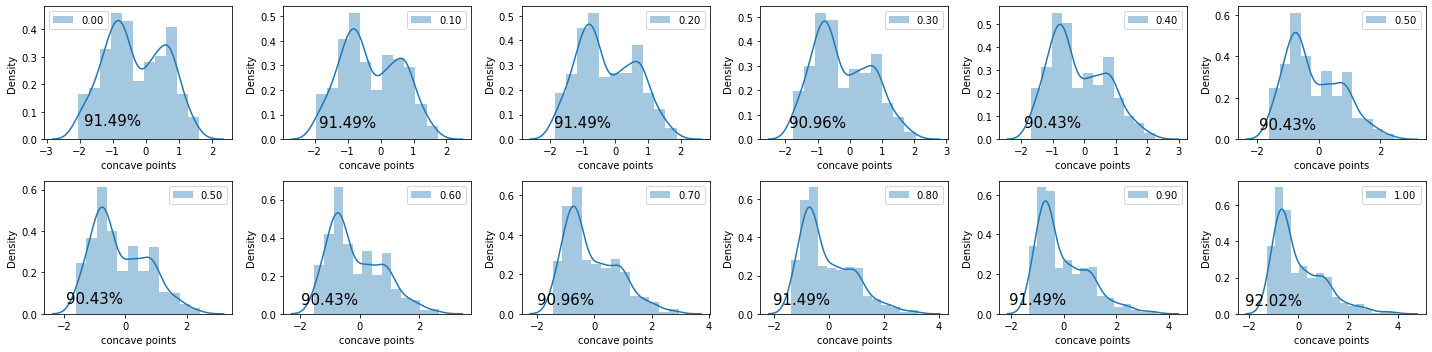

In [534]:
column = 'concave points'
skewed = ['perimeter', 'area', 'compactness', 'concavity', 'concave points', 'fractal_dimension']
features = df_std[skewed]
print(features)

pt = PowerTransformer(method='yeo-johnson', standardize=False)

# fit the data to the power transform
skl_yeo = pt.fit(features)
print(pt.lambdas_)

fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

frames = 5
rows = 2
inc = 1.0 / (frames*2.0)

for i in range(rows):
    for j in range(frames+1):
        col_l = (inc * (i*(frames) + j))
        pt.lambdas_ = np.array([col_l]*6)
        skl_yeo = pt.transform(features)
        df_features = pd.DataFrame(data=skl_yeo, columns=skewed)

        array = df_features.values
        transformedX = array

        x_train, x_test, y_train, y_test = train_test_split(transformedX, y, test_size = test_size, random_state = seed)
        model = LogisticRegression(solver='lbfgs', max_iter=100)
        model.fit(x_train, y_train)
        results = model.score(x_test, y_test)
        acc = results * 100
        print(f"accuracy: {acc:.2f}%") # percentage of accuracy

        ax = fig.add_subplot(rows,frames+1, ((i*(frames+1) + j + 1)))
        dplot = sns.distplot(df_features[column],  ax=ax, label="{:.2f}".format(col_l))
        dplot.annotate(f"{acc:.2f}%", xy = (-1, 0.05), horizontalalignment='center', fontsize=15)
        plt.legend()

fig.tight_layout()
plt.savefig('lambdas.png', dpi=500)
plt.show()